In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from matplotlib.colors import LogNorm
import csv

In [3]:
from model_pvp import model_pvp
from generate_distribution import generate_distribution
from make_prob_matrix import make_prob_matrix
from get_fundamental_matrix import get_fundamental_matrix
from get_mean_time import get_mean_time
from get_border_cases import get_border_cases

In [4]:
from digitalize_states import digitalize_states
import get_games_strategy

In [34]:
N = 16

counts_pvp = np.load('../data/qr_counts_pvp.npy')
counts_pvp_400 = np.load('../data/qr_counts_pvp_400.npy')
counts_pve_border = np.load('../data/qr_counts_pve_border.npy')
counts_pve_center = np.load('../data/qr_counts_pve_center.npy')

qr_pve_border = np.load('../data/qr_pve_border.npy')
qr_pve_center = np.load('../data/qr_pve_center.npy')
qr_pvp = np.load('../data/qr_pvp.npy')
qr_pvp_400 = np.load('../data/qr_pvp_400.npy')

strategy_pve_center = np.load('../data/strategy_pve_center.npy')
strategy_pve_border = np.load('../data/strategy_pve_border.npy')
strategy_random = np.ones ((N + 1, N + 1), dtype=np.float64) * 0.5

strategy_pvp_border = np.load('../data/strategy_pvp_border.npy')
strategy_pvp_center = np.load('../data/strategy_pvp_center.npy')

strategy_pvp_400_border = np.load('../data/strategy_pvp_400_border.npy')
strategy_pvp_400_center = np.load('../data/strategy_pvp_400_center.npy')

strategy_pvp_border_optimal = np.load('../data/strategy_pvp_border_optimal.npy')
strategy_pvp_center_optimal = np.load('../data/strategy_pvp_center_optimal.npy')


strategy_pve_border_optimal = np.zeros ((N + 1, N + 1), dtype=np.float64)
strategy_pve_center_optimal = np.zeros ((N + 1, N + 1), dtype=np.float64)
strategy_pve_center_optimal = \
    np.diag(np.ones(N + 1) * 0.5) + \
    np.diag(np.ones(N), -1) + \
    np.diag(np.zeros(N), +1)
strategy_pve_center_optimal = strategy_pve_center_optimal.T

strategy_pve_center_optimal_2d = np.zeros ((N + 1, N + 1), dtype=np.float64)
strategy_pve_center_optimal_2d[1:N, 1] = 1
#strategy_pve_center_optimal_2d[:, N - 1] = 1
#strategy_pve_center_optimal_2d[1, :] = 1
strategy_pve_center_optimal_2d[N - 1, 1:N] = 1
strategy_pve_center_optimal_2d = strategy_pve_center_optimal_2d.T

qr_bvb, probabilities = make_prob_matrix(N, strategy_random, strategy_random)

qr_pve_border_pure, probabilities = make_prob_matrix(N, strategy_random, strategy_pve_border)
qr_pve_center_pure, probabilities = make_prob_matrix(N, strategy_pve_center, strategy_random)
qr_pvp_pure, probabilities = make_prob_matrix(N, strategy_pvp_center, strategy_pvp_border)
qr_pvp_400_pure, probabilities = make_prob_matrix(N, strategy_pvp_400_center, strategy_pvp_400_border)

qr_pve_border_optimal, probabilities = make_prob_matrix(N, strategy_random, strategy_pve_border_optimal)
qr_pve_center_optimal, probabilities = make_prob_matrix(N, strategy_pve_center_optimal, strategy_random)
qr_pve_center_optimal_2d, probabilities = make_prob_matrix(N, strategy_pve_center_optimal_2d, strategy_random)

qr_pvp_optimal, probabilities = make_prob_matrix(N, strategy_pvp_center_optimal, strategy_pvp_border_optimal)

<AxesSubplot: >

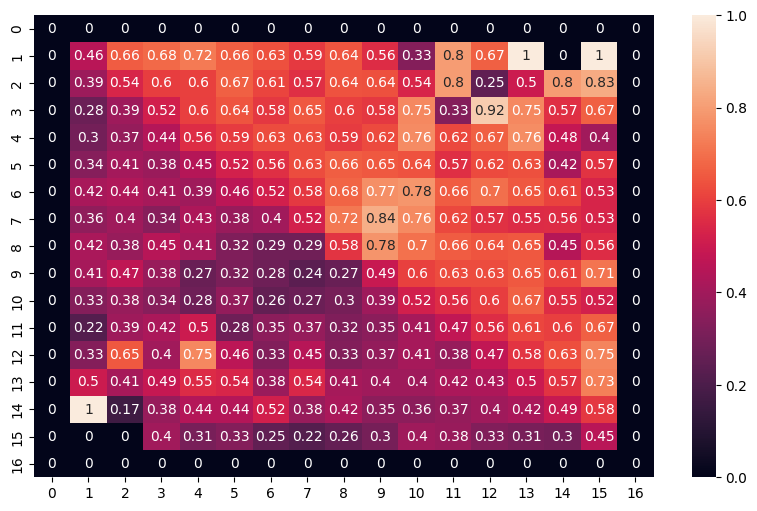

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(strategy_pvp_center, annot=True)

<AxesSubplot: >

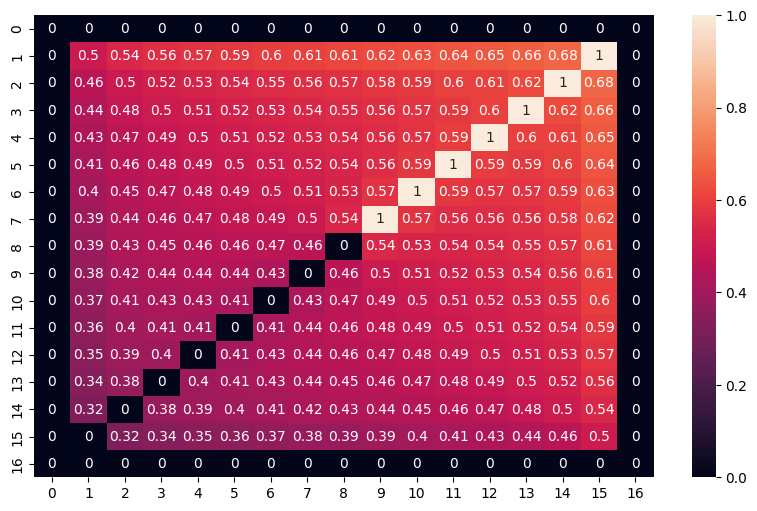

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(strategy_pvp_center_optimal, annot=True)

In [18]:
strategy_pvp_center_optimal.shape, strategy_pve_center_optimal_2d.shape

((17, 17), (17, 17))

In [14]:
strategy_pvp_border.shape

(17, 17)

In [22]:
def qr_to_probabilities(qr, N):
    frequencies = qr.copy()
    border = sorted(get_border_cases(N))
    for i in np.arange(len(border)-1, -1, step = -1):
        frequencies = np.delete(frequencies, border[i], axis = 0)
        frequencies = np.delete(frequencies, border[i], axis = 1)
    return frequencies
def qr_get_r(qr, N):
    frequencies = qr.copy()
    border = sorted(get_border_cases(N))
    #for state in reversed(border):
    frequencies = np.delete(frequencies, border, axis = 0)
    inner_states = sorted(set(range(qr.shape[0])) - set(border))
    #for state in reversed(inner_states):
    frequencies = np.delete(frequencies, inner_states, axis = 1)
    return frequencies

In [19]:
qr_pvp_optimal.shape

(289, 289)

In [33]:
len(get_border_cases(N)), len(set(get_border_cases(N)))

(64, 64)

(225, 225) (225, 64) (225, 64)


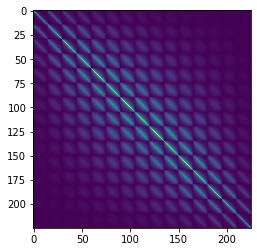

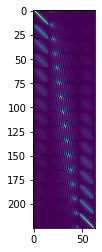

In [67]:
probability_matrix = qr_to_probabilities(qr_bvb, N)
fundamental_matrix = get_fundamental_matrix(probability_matrix)
r = qr_get_r(qr_bvb, N)
prod = np.dot(fundamental_matrix, r)
print(fundamental_matrix.shape, r.shape, prod.shape)
plt.imshow(fundamental_matrix)
plt.figure()
plt.imshow(prod)

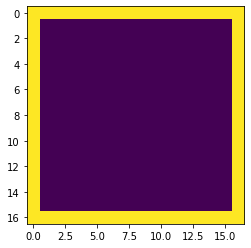

In [68]:
border = sorted(get_border_cases(N))
res = np.zeros((N + 1) * (N + 1))
res[border] = 1
res = res.reshape((N + 1), (N + 1))
plt.imshow(res)

In [64]:
qr_bvb[N + 2][N + 1], 

0.25

In [66]:
print(N + 1)
border

17


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 33,
 34,
 50,
 51,
 67,
 68,
 84,
 85,
 101,
 102,
 118,
 119,
 135,
 136,
 152,
 153,
 169,
 170,
 186,
 187,
 203,
 204,
 220,
 221,
 237,
 238,
 254,
 255,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288]

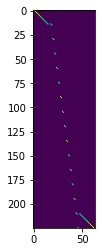

In [69]:
plt.imshow(r)

In [73]:
center = (N - 1) * ((N - 1) // 2) + (N - 1) // 2
mean_time = get_mean_time(N - 1, fundamental_matrix)
print(mean_time)
prod[center].sum()

75.20846497681381


0.9999999999999998

In [78]:
qr = qr_pve_center.copy()
probability_matrix = qr_to_probabilities(qr, N)
fundamental_matrix = get_fundamental_matrix(probability_matrix)
r = qr_get_r(qr, N)
fundamental_matrix_2 = get_fundamental_matrix(probability_matrix @ probability_matrix)
odd = (probability_matrix @ fundamental_matrix_2 @ r)[center].sum()
even = (fundamental_matrix_2 @ r)[center].sum()
print(odd, even)

0.3049242424242422 0.6950757575757576


In [ ]:
mean_time = get_mean_time(N - 1, fundamental_matrix)
print(mean_time)
prod[(N - 1) * ((N - 1) // 2) + (N - 1) // 2].sum()

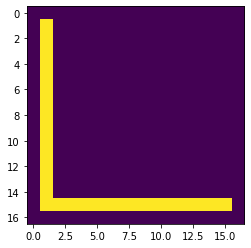

In [103]:
plt.imshow(strategy_pve_center_optimal_2d.T)

In [84]:
x, y = 8, 9
qr_pve_center_optimal[(N+1) * x + y, (N+1) * (x - 0) + (y + 1)]

0.0

In [37]:
qrs = {
    'pve_border': qr_pve_border,
    'pve_center': qr_pve_center,
    'bvb': qr_bvb,
    'pve_border_pure': qr_pve_border_pure,
    'pve_center_pure': qr_pve_center_pure,
    'pvp': qr_pvp,
    'pvp_pure': qr_pvp_pure,
    'pvp_400': qr_pvp_400,
    'pvp_400_pure': qr_pvp_400_pure,
    'pve_border_optimal': qr_pve_border_optimal,
    'pve_center_optimal': qr_pve_center_optimal,
    'pve_center_optimal_2d': qr_pve_center_optimal_2d,
    'pvp_optimal': qr_pvp_optimal,
}

In [ ]:
def amc_parity(fundamental_matrix, qr):


# Modelling

In [38]:
from tqdm.notebook import tqdm
num_steps = 10000
turns = np.arange(0, num_steps + 1)
probs = {'turns': turns}
stats = {}
for name, qr in tqdm(qrs.items()):
    probability_matrix = qr_to_probabilities(qr, N)
    fundamental_matrix = get_fundamental_matrix(probability_matrix)
    mean_time = get_mean_time(N - 1, fundamental_matrix)
    stats['amc_' + name] = {'even': 'NA', 'odd': 'NA', 'mean_time': mean_time}
    
    d, prob, (even, odd) = model_pvp(N, qr, num_steps=num_steps)
    mean_time = np.dot(prob, turns)
    probs['model_' + name] = prob
    stats['model_' + name] = {'even': even, 'odd': odd, 'mean_time': mean_time}
    

  0%|          | 0/13 [00:00<?, ?it/s]

In [39]:
stats

{'amc_pve_border': {'even': 'NA', 'odd': 'NA', 'mean_time': 71.11610486891385},
 'model_pve_border': {'even': 0.5131086142322095,
  'odd': 0.48689138576778945,
  'mean_time': 71.11610486891385},
 'amc_pve_center': {'even': 'NA',
  'odd': 'NA',
  'mean_time': 145.44886363636346},
 'model_pve_center': {'even': 0.3049242424242409,
  'odd': 0.6950757575757576,
  'mean_time': 145.44886363636337},
 'amc_bvb': {'even': 'NA', 'odd': 'NA', 'mean_time': 75.20846497681381},
 'model_bvb': {'even': 0.4957689733196263,
  'odd': 0.5042310266803719,
  'mean_time': 75.2084649768138},
 'amc_pve_border_pure': {'even': 'NA',
  'odd': 'NA',
  'mean_time': 73.79268566819664},
 'model_pve_border_pure': {'even': 0.5122443535433675,
  'odd': 0.48775564645663017,
  'mean_time': 73.7926856681966},
 'amc_pve_center_pure': {'even': 'NA',
  'odd': 'NA',
  'mean_time': 145.84942916972528},
 'model_pve_center_pure': {'even': 0.3035013989275322,
  'odd': 0.6964986010724641,
  'mean_time': 145.84942916972517},
 'amc_pv

# Simulations

In [40]:
turn_bins = np.arange(0, len(prob) + 1)
for name, qr in qrs.items():
    gen_turns = generate_distribution(N, qr, return_games=False)
    prob_gen, _ = np.histogram(gen_turns, bins=turn_bins, density=True)
    odd = np.mean(np.array(gen_turns) % 2)
    even = 1 - odd
    mean_time = np.mean(gen_turns)
    probs['simulation_' + name] = prob_gen
    stats['simulation_' + name] = {'even': even, 'odd': odd, 'mean_time': mean_time}

100%|██████████| 100000/100000 [00:51<00:00, 1952.56it/s]


# Experiment

In [41]:
pvp_pmf = np.load('../data/experiment_pvp_pmf.npy')
pvp_400_pmf = np.load('../data/experiment_pvp_400_pmf.npy')
pve_border_pmf = np.load('../data/experiment_pve_border_pmf.npy')
pve_center_pmf = np.load('../data/experiment_pve_center_pmf.npy')

pmfs = {
    'pvp': pvp_pmf,
    'pvp_400': pvp_400_pmf,
    'pve_border': pve_border_pmf,
    'pve_center': pve_center_pmf,
}
for pmf_name, pmf in pmfs.items():
    pmf = np.pad(pmf, (0, len(turns) - len(pmf)))
    probs['experiment_' + pmf_name] = pmf
    mean_time = np.dot(turns, pmf)
    even = np.sum(pmf[::2])
    odd = np.sum(pmf[1::2])
    stats['experiment_' + pmf_name] = {'even': even, 'odd': odd, 'mean_time': mean_time}


In [42]:
df_time_prob = pd.DataFrame(probs)
df_time_prob.to_excel('../data/absorption_time_pmf.xlsx')

In [43]:
df_stats_prob = pd.DataFrame(stats).T
df_stats_prob.to_excel('../data/absorption_time_stats.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


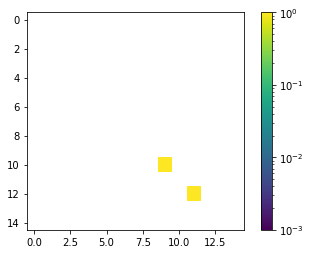

In [34]:
def g_test(N, counts):
    import scipy
    import itertools
    pvalues = np.zeros((N+1, N+1), dtype=np.float64)
    for i, j in itertools.product(range(1, N), range(1, N)):
        cont_table = np.array([[0, 0], [0, 0]], dtype=np.float64)
        expected_table = np.array([[0, 0], [0, 0]], dtype=np.float64)
        shifts     = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        strategies = [(1, 1), (0, 1), (0, 0), (1, 0)]
        for (dx, dy), (ii, jj) in zip(shifts, strategies):
            st = i * (N+1) + j
            fn = (i + dx) * (N+1) + (j + dy)
            cont_table[ii][jj] = counts[st][fn]
        try:
            assert(np.sum(cont_table.flatten()) > 10)
            g, p, dof, expctd = scipy.stats.chi2_contingency(cont_table)
        except:
            p = 1
            g = 0
        pvalues[i, j] = p
    from statsmodels.stats import multitest
    pvalues = multitest.fdrcorrection(pvalues[1:N, 1:N].flatten())[1]
    pvalues = pvalues.reshape(N-1, N-1)
    return pvalues < 0.4
import matplotlib
pvalues = g_test(N, counts_pvp_400)
plt.imshow(pvalues, norm=matplotlib.colors.LogNorm(), vmin=1e-3)
plt.colorbar()

In [14]:
import random
for x in range(10):
    if random.random() < 0.1:
        break
else:
    print('break not happend')

In [15]:
d = {1, 2, 17, 10 ** 15, 1.2e8}

In [21]:
"""This function does some strange things without arguments."""

['__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 'add',
 'clear',
 'copy',
 'difference',
 'difference_update',
 'discard',
 'intersection',
 'intersection_update',
 'isdisjoint',
 'issubset',
 'issuperset',
 'pop',
 'remove',
 'symmetric_difference',
 'symmetric_difference_update',
 'union',
 'update']